# Preprocessing Visualization

Visualize the preprocessing and data augmentations on sample training images.

In [2]:
import numpy as np
import pandas as pd
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

## Apply Transformations and Augmentations to Training Images

https://pytorch.org/vision/stable/transforms.html



*   Preprocess: Resize images to 224x224 pixels to decrease computational cost
*   Data Augmentation: Randomly rotate images ± 10 degrees
*   Data Augmentation: Randomly flip images horizonontally.
*   Data Augmentation: Randomly jitter brightness, contrast, and saturation
*   Preprocess: Normalize images to ImageNet mean and std for transfer learning



In [5]:
# transformations and augmentations to apply to images
# https://pytorch.org/vision/stable/transforms.html
transform = transforms.Compose([
		transforms.Resize(size=(224, 224)),
		# transforms.Grayscale(), (do not greyscale since ResNet trained on color images)
		# rotation augmentation
		transforms.RandomRotation(10),
		# random flip augmentaion 
		transforms.RandomHorizontalFlip(),
		# jitter brightness, contrast, saturation augmentaion
		transforms.ColorJitter(brightness=0.2, contrast=0.1, saturation=0.1, hue=0),
		# convert from image to tensor (for pytorch)
		transforms.ToTensor(),
		# use ImageNet standard mean and std dev to normalize
		transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

])

# load KDEF straight face images
dataset = ImageFolder('data/face_images_80_10_10/train', transform=transform)

idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}

print(idx_to_class)

{0: 'afraid', 1: 'angry', 2: 'disgusted', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprised'}


## Plot Sample Images in Dataset with Transofrmations Applied

 (normalization not shown)

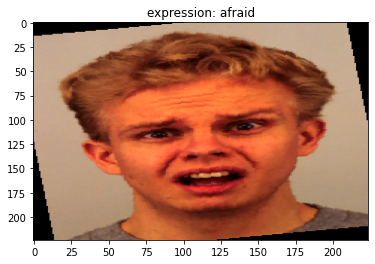

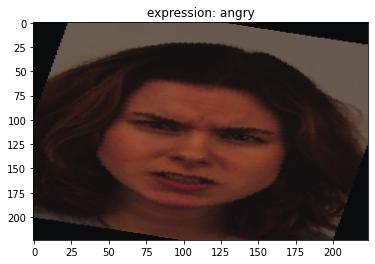

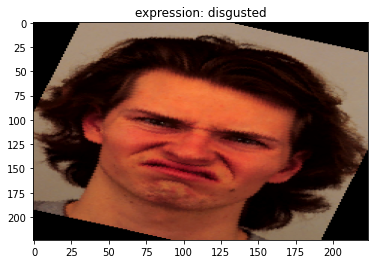

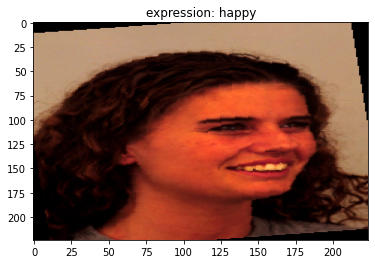

In [7]:
def imshow(img, label):
    inverse_normalize = transforms.Normalize(
        mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
        std=[1/0.229, 1/0.224, 1/0.255]
    )
    # undo normalization for viewing
    img = inverse_normalize(img)
    plt.imshow(transforms.ToPILImage()(img), aspect='auto')
    plt.title(f'expression: {label}')
    plt.show()

# afraid
sample_image, sample_target = dataset[450]
imshow(sample_image, idx_to_class[sample_target])

# angry
sample_image, sample_target = dataset[680]
imshow(sample_image, idx_to_class[sample_target])

# disgusted
sample_image, sample_target = dataset[1600]
imshow(sample_image, idx_to_class[sample_target])

# happy
sample_image, sample_target = dataset[1712]
imshow(sample_image, idx_to_class[sample_target])